# `np.inner`

In [1]:
a = np.random.rand(5, 8)
b = np.random.rand(5, 8)
z1 = np.sum(a * b, axis=1) # shape (5, 8)
z2 = np.inner(a, b) # shape (5, 5)
np.allclose(
   z2,
   np.matmul(a, b.T)
)
z2

array([[2.76864329, 2.87232149, 2.56739045, 2.80818715, 3.51810212],
       [1.69300999, 2.1348502 , 1.73098965, 2.44679411, 2.04298803],
       [2.59501965, 2.56424788, 2.39394055, 2.73327938, 3.23411428],
       [2.56135662, 2.95623277, 2.83642353, 3.51236731, 3.6622766 ],
       [2.5237814 , 2.93450904, 2.41226289, 3.18623308, 3.29557277]])

# matmul

In [9]:
import tensorflow as tf

a = tf.complex(
    tf.random.uniform((5, 3)),
    tf.random.uniform((5, 3))
)
b = tf.complex(
    tf.random.uniform((5, 3)),
    tf.random.uniform((5, 3))
)
# This will throw an error because of shape mismatch
tf.matmul(a, b)

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [5,3], In[1]: [5,3] [Op:MatMul] name: 

In [7]:
# This will pass, with shape (5, 5)
tf.matmul(a, b, transpose_b=True)

<tf.Tensor: shape=(5, 5), dtype=complex64, numpy=
array([[ 0.6517752 +1.8900335j,  0.6641804 +1.5638969j,
         0.01959801+2.1848505j,  1.0055488 +2.0748847j,
        -0.05060518+2.0493586j],
       [ 0.10377342+1.7991651j,  0.40725392+1.4740322j,
        -0.4436674 +2.0666642j,  0.4796394 +1.7985704j,
        -0.649327  +1.900778j ],
       [ 0.37906682+2.2964396j,  0.5944102 +1.6937097j,
         0.00378609+2.5813894j,  0.6942075 +2.2500267j,
        -0.2461803 +2.775123j ],
       [-0.2415368 +2.0485957j,  0.12517369+1.8538208j,
        -0.9888905 +2.5509334j,  0.29799938+2.3669107j,
        -1.5004113 +2.2373662j],
       [-0.08091819+1.0990679j, -0.05031073+1.0065899j,
        -0.57724214+1.2409792j,  0.08845353+1.4315968j,
        -0.7018248 +1.0456214j]], dtype=complex64)>

In [8]:
# This will pass, with shape (3, 3)
tf.matmul(a, b, adjoint_a=True)

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[2.6702282+0.56675386j, 2.3486257+0.17541146j,
        4.3864293+0.938671j  ],
       [2.7273402+0.16713583j, 2.3818645-0.03198898j,
        4.2256236+0.15659618j],
       [2.8689394+0.28372884j, 2.2188005+0.11142135j,
        4.31059  +0.35723472j]], dtype=complex64)>

# `@` Operator

In [12]:
import numpy as np
import tensorflow as tf
import torch

a = np.random.rand(7, 4, 3, 5)
b = np.random.rand(5)
c = np.random.rand(1, 1, 5, 3)
# this is working as expected, returns numpy.ndarray
a @ b

array([[[1.02708171, 1.4126937 , 1.76003128],
        [1.4760704 , 0.55246341, 1.3477294 ],
        [1.32453505, 1.36103516, 1.22096432],
        [1.43111094, 1.35307003, 1.31946242]],

       [[1.47600898, 1.24252136, 1.44797387],
        [0.44788256, 1.55469772, 1.18733395],
        [1.89028454, 1.7866138 , 1.0975385 ],
        [0.7172708 , 0.97773999, 1.4485454 ]],

       [[0.9926393 , 1.07094461, 1.5091778 ],
        [0.97136418, 1.5252247 , 1.24932155],
        [0.6702907 , 1.21274665, 1.35836754],
        [1.10766615, 0.57732513, 0.81558131]],

       [[1.48755396, 1.38587448, 1.38424952],
        [1.68045735, 0.95535642, 0.99340811],
        [0.79776941, 1.48920484, 1.17833424],
        [0.99618318, 1.30668784, 1.39240752]],

       [[0.71370397, 0.42646706, 0.95790275],
        [0.71523313, 1.53485735, 1.24725502],
        [1.32626843, 1.30510916, 1.35745198],
        [1.14549592, 1.16914376, 0.8345336 ]],

       [[1.23650079, 1.3204551 , 0.59215602],
        [1.03759871, 1.3

In [13]:
# This throws an error, 
# Torch and NumPy is not compatible with @ operator
a @ torch.tensor(b)

TypeError: unsupported operand type(s) for @: 'numpy.ndarray' and 'Tensor'

In [14]:
# This will throw an error, 
# since Tensorflow's matmul is called
a @ tf.constant(b)

InvalidArgumentError: {{function_node __wrapped__BatchMatMulV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} In[1] ndims must be >= 2: 1 [Op:BatchMatMulV2] name: 

In [15]:
# This will pass, returns a tf.Tensor
a @ tf.constant(c)

<tf.Tensor: shape=(7, 4, 3, 3), dtype=float64, numpy=
array([[[[1.34184537, 1.83355404, 1.20719363],
         [1.31695584, 1.55947693, 1.34276477],
         [1.91340279, 2.49841754, 2.1090191 ]],

        [[1.78240446, 2.38256623, 1.8438287 ],
         [0.81819531, 1.26311868, 1.03905896],
         [1.70372542, 2.14559119, 1.48568599]],

        [[1.10413868, 1.29895796, 1.21998039],
         [1.36282772, 1.41317777, 0.85304004],
         [1.17395347, 1.45328741, 1.39904075]],

        [[1.72301605, 2.10832668, 1.51570258],
         [1.56311974, 2.00091464, 1.37178875],
         [1.29663268, 1.31036151, 0.77513562]]],


       [[[1.9662993 , 2.59353481, 1.7386006 ],
         [1.28528656, 1.78024146, 1.60040594],
         [1.51421852, 1.89580317, 1.47311258]],

        [[0.29517676, 0.54891165, 0.82133865],
         [1.34605632, 1.66514655, 1.63801271],
         [1.00947282, 1.31842274, 1.39435818]],

        [[1.75284216, 2.12673903, 2.01129724],
         [1.98972032, 2.61579771, 2.143

In [16]:
# This will pass, returns a tf.Tensor
# It does not matter if the first or
# second argument of matmul is tf.Tensor
tf.constant(a) @ c

<tf.Tensor: shape=(7, 4, 3, 3), dtype=float64, numpy=
array([[[[1.34184537, 1.83355404, 1.20719363],
         [1.31695584, 1.55947693, 1.34276477],
         [1.91340279, 2.49841754, 2.1090191 ]],

        [[1.78240446, 2.38256623, 1.8438287 ],
         [0.81819531, 1.26311868, 1.03905896],
         [1.70372542, 2.14559119, 1.48568599]],

        [[1.10413868, 1.29895796, 1.21998039],
         [1.36282772, 1.41317777, 0.85304004],
         [1.17395347, 1.45328741, 1.39904075]],

        [[1.72301605, 2.10832668, 1.51570258],
         [1.56311974, 2.00091464, 1.37178875],
         [1.29663268, 1.31036151, 0.77513562]]],


       [[[1.9662993 , 2.59353481, 1.7386006 ],
         [1.28528656, 1.78024146, 1.60040594],
         [1.51421852, 1.89580317, 1.47311258]],

        [[0.29517676, 0.54891165, 0.82133865],
         [1.34605632, 1.66514655, 1.63801271],
         [1.00947282, 1.31842274, 1.39435818]],

        [[1.75284216, 2.12673903, 2.01129724],
         [1.98972032, 2.61579771, 2.143

In [17]:
# This will pass, returns a tf.Tensor
tf.constant(a) @ torch.tensor(c)

<tf.Tensor: shape=(7, 4, 3, 3), dtype=float64, numpy=
array([[[[1.34184537, 1.83355404, 1.20719363],
         [1.31695584, 1.55947693, 1.34276477],
         [1.91340279, 2.49841754, 2.1090191 ]],

        [[1.78240446, 2.38256623, 1.8438287 ],
         [0.81819531, 1.26311868, 1.03905896],
         [1.70372542, 2.14559119, 1.48568599]],

        [[1.10413868, 1.29895796, 1.21998039],
         [1.36282772, 1.41317777, 0.85304004],
         [1.17395347, 1.45328741, 1.39904075]],

        [[1.72301605, 2.10832668, 1.51570258],
         [1.56311974, 2.00091464, 1.37178875],
         [1.29663268, 1.31036151, 0.77513562]]],


       [[[1.9662993 , 2.59353481, 1.7386006 ],
         [1.28528656, 1.78024146, 1.60040594],
         [1.51421852, 1.89580317, 1.47311258]],

        [[0.29517676, 0.54891165, 0.82133865],
         [1.34605632, 1.66514655, 1.63801271],
         [1.00947282, 1.31842274, 1.39435818]],

        [[1.75284216, 2.12673903, 2.01129724],
         [1.98972032, 2.61579771, 2.143

# The `tensordot` operation

In [20]:
# Dot product
a = np.random.rand(5)
b = np.random.rand(5)
np.allclose(
    np.dot(a, b),
    np.tensordot(a, b, 1)
)

True

In [21]:
# cross product
a = np.random.rand(5)
b = np.random.rand(3)
np.allclose(
    np.outer(a, b),
    np.tensordot(a, b, 0)
)

True

In [22]:
# matrix multiplication
a = np.random.rand(5, 3)
b = np.random.rand(3, 5)
np.allclose(
    np.matmul(a, b),
    np.tensordot(a, b, 1)
)

True

In [23]:
# double contraction
a = np.random.rand(5, 3)
b = np.random.rand(5, 3)
np.allclose(
   np.tensordot(a, b, 2),
   np.trace(a @ b.T)
)  

True

In [24]:
# batched multiplication
a = np.random.rand(2, 4, 2)
b = np.random.rand(3, 4, 2)
# this results a tensor of shape (2, 3)
np.tensordot(a, b, axes=[[1, 2], [1, 2]])

array([[3.00854999, 1.86352968, 2.43732595],
       [3.95194149, 3.13093416, 2.5046027 ]])

In [25]:
# shape heuristic axis=0
a = np.random.rand(2, 3, 4, 5)
b = np.random.rand(6, 7, 8)
np.allclose(
    np.tensordot(a, b, 0).shape,
    [2, 3, 4, 5, 6, 7, 8]
)

True

In [28]:
# shape heuristic axis=1
a = np.random.rand(2, 3, 4, 5)
b = np.random.rand(5, 6, 7)
np.allclose(
    np.tensordot(a, b, 1).shape,
    [2, 3, 4, 6, 7]
)

True

In [29]:
# shape heuristic axis=2
a = np.random.rand(2, 3, 4, 5)
b = np.random.rand(4, 5, 6, 7)
np.allclose(
    np.tensordot(a, b, 2).shape,
    [2, 3, 6, 7]
)

True

# Einsum

In [32]:
# for-loop
import numpy as np
X = np.random.rand(5, 3)
Y = np.random.rand(3, 7)
Z = np.zeros((5, 7)) # expected shape
for ii in range(5):
    for jj in range(7):
        Z[ii, jj] = X[ii, :].dot(Y[:, jj])
        
print(Z.shape)
Z

(5, 7)


array([[0.93567418, 0.53537883, 0.57668756, 0.24100844, 0.44024937,
        0.87891149, 0.58640976],
       [0.55518846, 0.54067966, 0.76482938, 0.08955489, 0.75111835,
        0.53625584, 0.67988347],
       [0.40591606, 0.38675871, 0.41149019, 0.22272787, 0.44638866,
        0.56505403, 0.62863151],
       [0.59175425, 0.5927515 , 0.64777988, 0.32593274, 0.70987742,
        0.83479483, 0.96707957],
       [0.53863539, 0.29125687, 0.29593498, 0.14744528, 0.21370496,
        0.51003201, 0.31667585]])

In [33]:
# Dot product
a = np.random.rand(8)
b = np.random.rand(8)
np.allclose(
   np.inner(a, b),
   np.einsum("i,i", a, b)
)

True

In [35]:
# Outer product
a = np.random.rand(8)
b = np.random.rand(8)
np.allclose(
   np.outer(a, b),
   np.einsum("i,j", a, b)
)

True

In [38]:
X = np.random.rand(8, 8)
# Trace
np.allclose(
   np.trace(X),
   np.einsum("ii->", X)
)

True

In [37]:
# Diagonal extraction
np.allclose(
   np.diag(X),
   np.einsum("ii->i", X)
)

True

In [39]:
X = np.random.rand(4, 5)
# Tranpose of matrix
np.allclose(
   np.transpose(X),
   np.einsum("ij->ji", X)
)

True

In [40]:
# Tranpose of matrix
np.allclose(
   np.transpose(X),
   np.einsum("ji", X)
)

True

In [41]:
Y = np.random.rand(4, 5, 6)
# Swapaxes
np.allclose(
   np.swapaxes(Y, 0, 2),
   np.einsum("ijk->kji", Y)
)

True

In [42]:
# Swapaxes
np.allclose(
   np.swapaxes(Y, 0, 2),
   np.einsum("kji", Y)
)

True

In [43]:
X = np.random.rand(3, 4)
# Sum along rows
np.allclose(
   np.sum(X, axis=0),
   np.einsum("ij->j", X)
)

True

In [44]:
# Sum along columns
np.allclose(
   np.sum(X, axis=1),
   np.einsum("ij->i", X)
)

True

In [45]:
X = np.random.rand(4, 5)
# Identity function
np.allclose(
   X,
   np.einsum("ij->ij", X)
)

True

In [46]:
# Identity function
np.allclose(
   X,
   np.einsum("ij", X)
)

True

In [47]:
# Sum all elements
np.allclose(
   X.sum(),
   np.einsum("ij->", X)
)

True

In [48]:
# Hadamard
X = np.random.rand(2, 5, 3)
Y = np.random.rand(2, 3, 5)
np.allclose(
   X * Y.swapaxes(1, 2),
   np.einsum("ijk,ikj->ijk", X, Y)
)

True

In [49]:
# Multidimensional matrix multiplication
a = np.random.rand(1, 6, 3)
b = np.random.rand(8, 3, 7)
# shape (8, 6, 7)
np.allclose(
    np.einsum("...ij,...jk", a, b),
    np.matmul(a, b)
)

True

In [50]:
# Multidimensional dot product
a = np.random.rand(2, 5, 3, 6)
b = np.random.rand(7, 6, 4)
# shape (2, 5, 3, 7, 4)
np.allclose(
    np.einsum("...j,ijk->...ik", a, b),
    np.dot(a, b)
)

True

In [51]:
# High-dimensional tensordot
a = np.random.rand(1, 2, 3, 4, 5)  # (a, i, b, j, c)
b = np.random.rand(6, 4, 8, 2, 10) # (d, j, e, i, f)
# shape (1, 3, 5, 6, 8, 10)
# axes=(1, 3) vs. axes=(3, 1)
# shape=(2, 4) vs. shape(4, 2)
np.allclose(
   np.einsum("aibjc,djeif->abcdef", a, b),
   np.tensordot(a, b, axes=([1, 3], [3, 1]))
)

True

# Case Study: Pair-wise Pearson's Cross-Correlation

In [53]:
def faster_cross_corr(X, Y):
    """
    faster way to compute Pearson's correlation
    between each combination of pairs of two matrices
    returns a cross-correlation matrix
    [[x1:y1, x1:y2, x1:y3,...., x1:ym],
     [x2:y1, x2:y2, x2:y3,...., x1:ym],
     [...]
     [xn:y1, xn:y2, xn:y3,...., xn:ym]
    """
    X = X - np.mean(X, axis=0, keepdims=True) # zero mean
    Y = Y - np.mean(Y, axis=0, keepdims=True) # zero mean
    X = X / np.sqrt(np.sum(X**2, axis=0, keepdims=True)) # L2 normalization
    Y = Y / np.sqrt(np.sum(Y**2, axis=0, keepdims=True)) # L2 normalization
    R = X.T.dot(Y)

    return R

In [59]:
X = np.random.rand(8, 6)
Y = np.random.rand(8, 5)
R = faster_cross_corr(X, Y)
print(R.shape)
R

(6, 5)


array([[-0.75980183,  0.29176365, -0.26250606,  0.3487142 ,  0.34709856],
       [ 0.14236661, -0.15983855, -0.47342232,  0.07000178, -0.41667759],
       [ 0.35313361,  0.36766169,  0.51391557, -0.6485574 , -0.3118986 ],
       [ 0.63567825, -0.0389365 ,  0.64704818, -0.44731691, -0.16298567],
       [-0.36008797,  0.17249593,  0.11994358,  0.50965981,  0.70275759],
       [-0.82149036,  0.78011016, -0.6632514 , -0.03806758, -0.015441  ]])

# Case Study: Hausdorff Distance

In [62]:
import numpy as np

def HausdorffDist(A, B):
    """
    Compute the Hausdorff distance between two point clouds.
    Let A and B be subsets of metric space (Z, dZ),
    The Hausdorff distance between A and B, denoted by dH(A, B),
    is defined by:
    dH(A, B) = max(h(A, B), h(B, A)),
    where h(A, B) = max(min(d(a, b))
    and d(a, b) is a L2 norm
    dist_H = hausdorff(A, B)
    A: First point sets (M1 x N, with M1 observations in N dimension)
    B: Second point sets (M2 x N, with M2 observations in N dimension)
    ** A and B may have different number of rows, but must have the same
    number of columns.
    """
    # Find pairwise distance: (A - B)^2 = A^2 + B ^2 - 2AB
    A_sq = np.einsum('ij,ij->i', A, A)[:, None]
    B_sq = np.einsum('ij,ij->i', B, B) 
    AB = np.dot(A, B.T)
    D_mat = A_sq + B_sq - 2 * AB
    D_mat = np.sqrt(D_mat)
    # Find DH
    d_AB = np.min(D_mat, axis=0)
    d_BA = np.min(D_mat, axis=1)
    dH = np.maximum(
        np.max(d_AB),
        np.max(d_BA)
    )
    return(dH)

In [66]:
A = np.random.rand(28, 16)
B = np.random.rand(32, 16)
HausdorffDist(A, B)

1.4590736844255856

# Singular Value Decomposition (SVD)

In [60]:
import numpy as np
# Create a cloud of points inside of 3D ellipsoid
n = 2000 # number of points 
a, b, c =10, 6, 1 # axes lengths
# randomly generate 
x, y, z = [np.random.uniform(-d, d, n) for d in (a, b, c)]
inside =  ((x/a)**2 + (y/b)**2 + (z/c)**2) <= 1.0

# Use SVD to decompose the matrix
X = np.vstack([x[inside], y[inside], z[inside]]).T
X = X - X.mean(axis=0)
# s returns the standard deviation, sorted descendingly
U, s, Vh = np.linalg.svd(X)

# Recover
X_recovered = U @ (s * np.eye(U.shape[0], Vh.shape[0])) @ Vh

assert np.allclose(X, X_recovered)

# Leastsquare

In [67]:
import numpy as np
x = np.random.randn(100)
Y = 2 * x + 5 + np.random.randn(100)
# Two features, one feature for the input data x, 
# and another feature as constant, independent of the data.
X = np.vstack([x, np.ones_like(x)]).T
theta, res, rank, s = np.linalg.lstsq(X, Y)
theta

/var/folders/jv/p_nfc0852qv0dsy89d4j7kth0000gn/T/ipykernel_47477/2875150261.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta, res, rank, s = np.linalg.lstsq(X, Y)


array([1.94407724, 4.95076291])

In [68]:
res

array([89.13141719])

In [69]:
rank

2

In [70]:
s

array([10.19853324,  9.45736031])

# Case Study: Fitting Single Exponential Curve

In [71]:
import numpy as np
def fit_exp_with_offset(x, y):
    """
    Fitting y = a * exp(b * x) + c
    using a non-iterative method based on
    Regressions et Equations Integrales by Jean Jacquelin
    
    x and y are vectors of coordinates of the data points.
    They need to be sorted in ascending order, 
    e.g. (0, 0), (0, 1), ... (1, 0), ..., (3, 4), (3, 5), ...
    """
    # Start algorithm
    S = np.zeros_like(x)
    S[1:] = 0.5 * (y[:-1] + y[1:]) * np.diff(x)
    S = np.cumsum(S)
    # for k in range(1, len(S)):
    #     S[k] = S[k-1] + 1/2 * (y[k] + y[k-1]) * (x[k] - x[k-1])

    M = np.empty((2, 2))
    N = np.empty((2, 1))

    # Getting b
    M[0, 0] = np.sum((x - x[0])**2)
    M[0, 1] = np.sum((x - x[0]) * S)
    M[1, 0] = M[0, 1]
    M[1, 1] = np.sum(S**2)

    N[0, 0] = np.sum((y - y[0]) * (x - x[0]))
    N[1, 0] = np.sum((y - y[0]) * S)

    B = np.matmul(np.linalg.inv(M),  N)
    b = B[1, 0]

    # Getting a and c
    theta = np.exp(b * x)
    M[0, 0] = len(x)
    M[0, 1] = np.sum(theta)
    M[1, 0] = M[0, 1]
    M[1, 1] = np.sum(theta**2)

    N[0, 0] = np.sum(y)
    N[1, 0] = np.sum(y * theta)
    
    AC = np.matmul(np.linalg.inv(M), N)
    c = AC[0, 0]
    a = AC[1, 0]

    return a, b, c

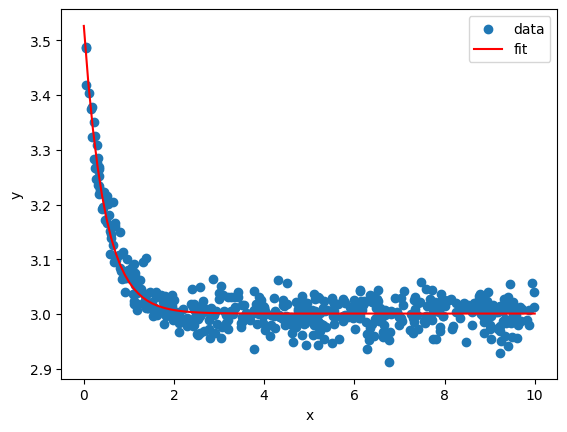

In [72]:
import matplotlib.pyplot as plt
x = np.random.rand(500) * 10
x = np.sort(x) # sorting x, required by the algorithm
y = 0.5 * np.exp(-2 * x) + 3 + np.random.randn(500) * 0.025
# fit the curve
a, b, c = fit_exp_with_offset(x, y)
# recreate the curve
x_pred = np.linspace(0, 10, 100)
y_pred = a * np.exp(b * x_pred) + c

# plot the data points and the fit
plt.scatter(x, y, label="data")
plt.plot(x_pred, y_pred, color="r", label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()